<a href="https://colab.research.google.com/github/dhrumil96/Digit-Recongnition/blob/master/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing all required library**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as plotly

!pip install -q geopandas
import geopandas as gpd
%matplotlib inline

In [103]:
from plotly import __version__
import plotly.offline as py 
from plotly.offline import init_notebook_mode, plot
init_notebook_mode(connected=True)
from plotly import tools
import plotly.graph_objs as go
import plotly.express as px
import folium
from folium.plugins import MarkerCluster
from folium import plugins
from sklearn.preprocessing import LabelEncoder

# **Import CSV Dataset of Airbnb**

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
df = pd.read_csv('/content/gdrive/My Drive/Machine Learning/new-york-city-airbnb-open-data/AB_NYC_2019.csv')

In [0]:
url = 'https://raw.githubusercontent.com/dhrumil96/UTS_ML_13315078/master/AB_NYC_2019.csv'
df = pd.read_csv(url)

# **Exploration of Data**

In [108]:
df.head()

id  ... availability_365
0  2539  ...              365
1  2595  ...              355
2  3647  ...              365
3  3831  ...              194
4  5022  ...                0

[5 rows x 16 columns]

In [10]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [12]:
df.describe()

id  ...  availability_365
count  4.889500e+04  ...      48895.000000
mean   1.901714e+07  ...        112.781327
std    1.098311e+07  ...        131.622289
min    2.539000e+03  ...          0.000000
25%    9.471945e+06  ...          0.000000
50%    1.967728e+07  ...         45.000000
75%    2.915218e+07  ...        227.000000
max    3.648724e+07  ...        365.000000

[8 rows x 10 columns]

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning:

invalid value encountered in greater_equal

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning:

invalid value encountered in less_equal



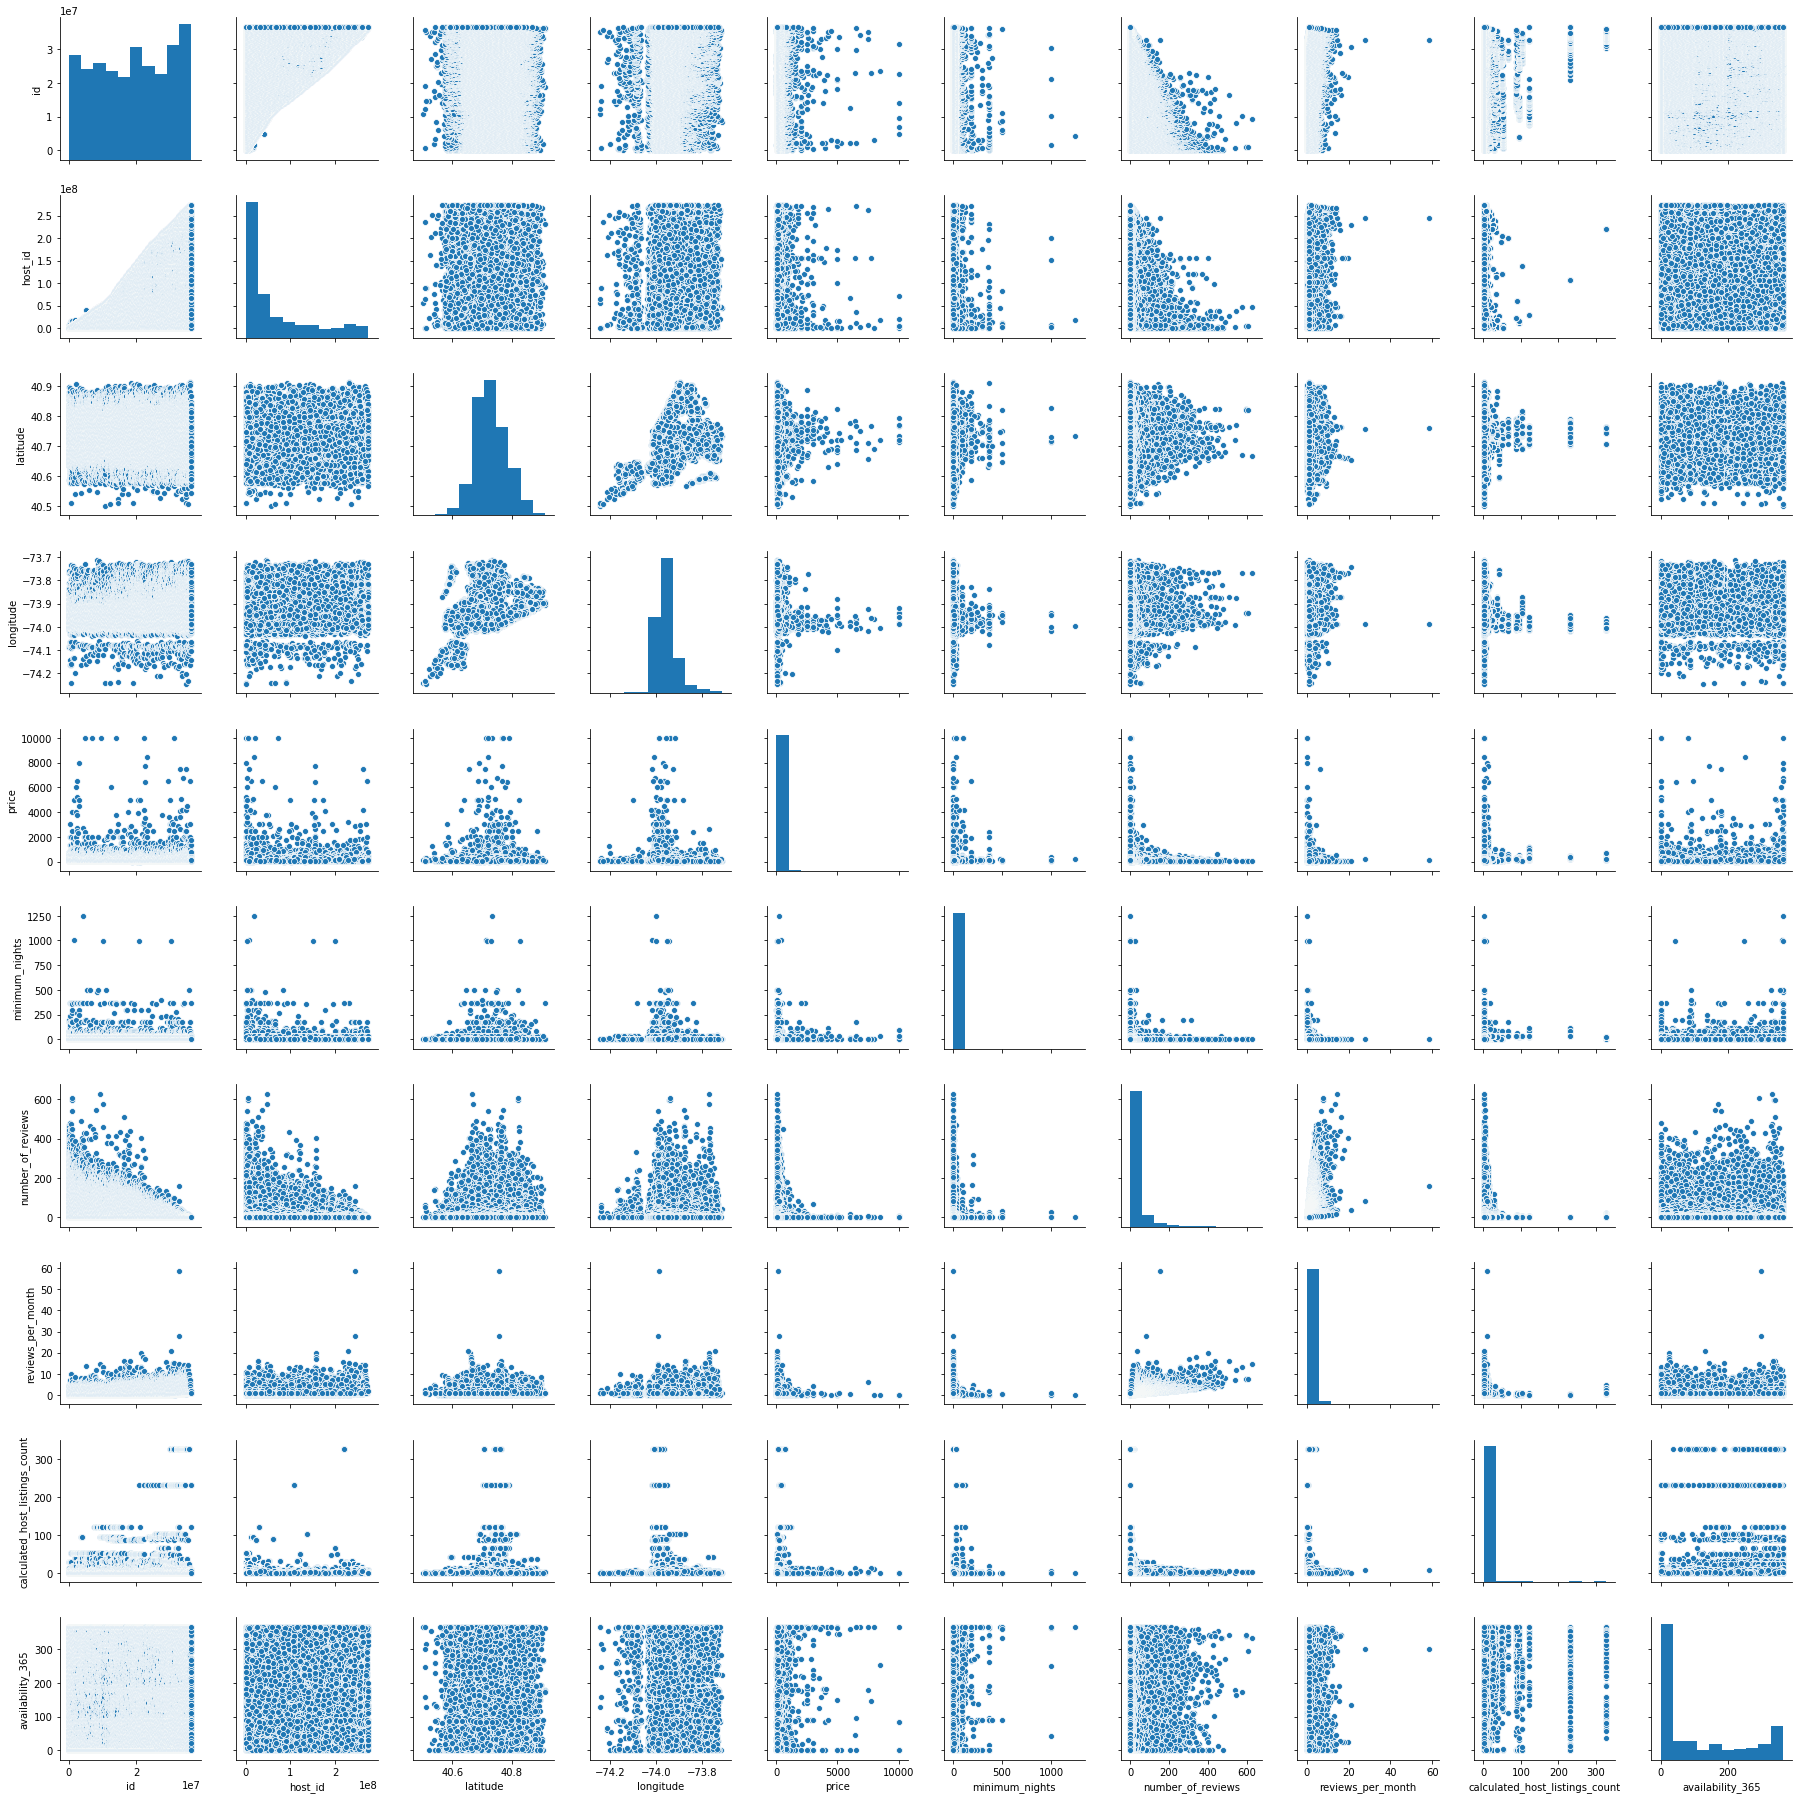

In [13]:
sns.pairplot(df)

In [14]:
df.corr()

id  ...  availability_365
id                              1.000000  ...          0.085468
host_id                         0.588290  ...          0.203492
latitude                       -0.003125  ...         -0.010983
longitude                       0.090908  ...          0.082731
price                           0.010619  ...          0.081829
minimum_nights                 -0.013224  ...          0.144303
number_of_reviews              -0.319760  ...          0.172028
reviews_per_month               0.291828  ...          0.185791
calculated_host_listings_count  0.133272  ...          0.225701
availability_365                0.085468  ...          1.000000

[10 rows x 10 columns]

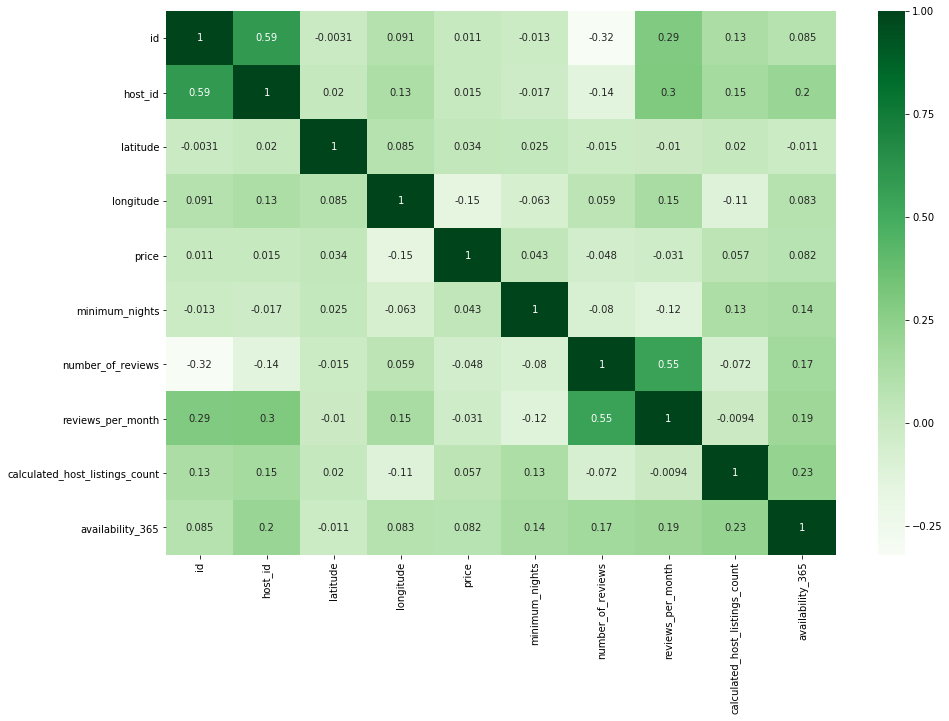

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='Greens',annot=True)
plt.show()

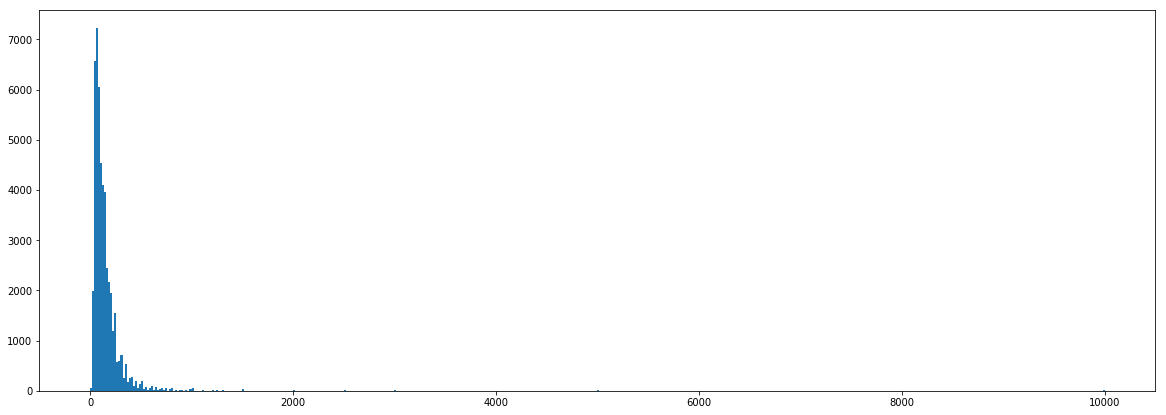

In [16]:
plt.figure(figsize=(20,7))
plt.hist(df['price'], bins=500)
plt.show()

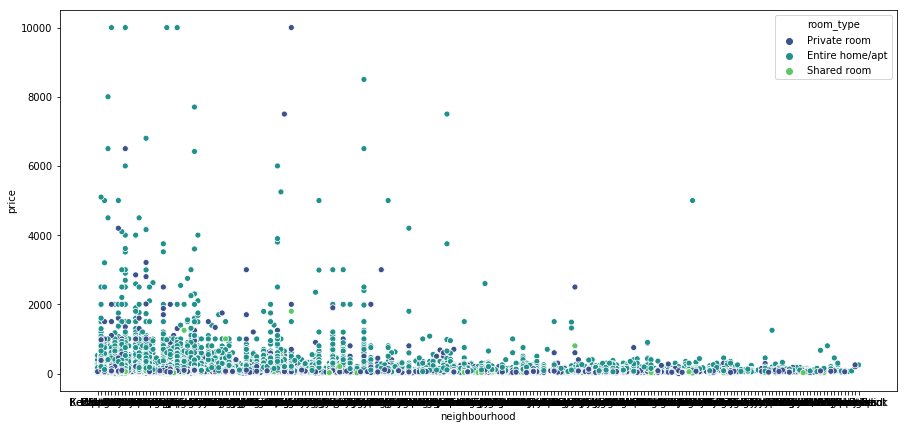

In [17]:
plt.figure(figsize=(15,7))
sns.scatterplot(df['neighbourhood'],df['price'],hue=df['room_type'], palette='viridis',)
plt.show()

In [0]:
df1=df.sort_values(by=['number_of_reviews'],ascending=False).head(1000)

In [0]:
df2=df.sort_values(by=['price'],ascending=False).head(1000)

In [23]:
print('Rooms with the most number of reviews')
Long=-73.80
Lat=40.80
mapdf1=folium.Map([Lat,Long],zoom_start=10)

mapdf1_rooms_map=plugins.MarkerCluster().add_to(mapdf1)

for lat,lon,label in zip(df1.latitude,df1.longitude,df1.name):
    folium.Marker(location=[lat,lon],icon=folium.Icon(icon='home'),popup=label).add_to(mapdf1_rooms_map)
mapdf1.add_child(mapdf1_rooms_map)

mapdf1

Rooms with the most number of reviews


In [24]:
print('Most Expensive rooms')
Long=-73.80
Lat=40.80
mapdf1=folium.Map([Lat,Long],zoom_start=10)

mapdf1_rooms_map=plugins.MarkerCluster().add_to(mapdf1)

for lat,lon,label in zip(df2.latitude,df2.longitude,df2.name):
    folium.Marker(location=[lat,lon],icon=folium.Icon(icon='home'),popup=label).add_to(mapdf1_rooms_map)
mapdf1.add_child(mapdf1_rooms_map)

mapdf1

Most Expensive rooms


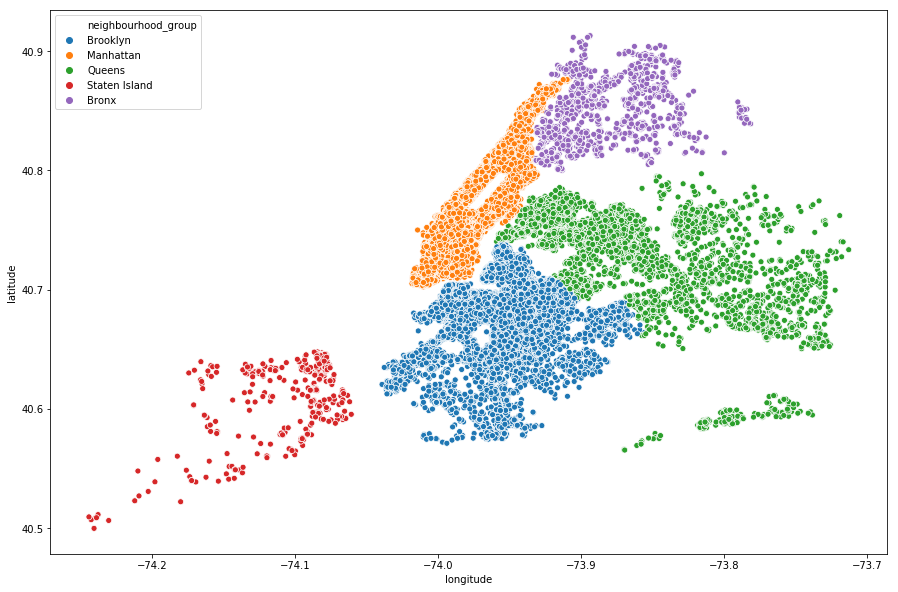

In [25]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=df)
plt.show()

In [26]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f74548f0438>,
      dtype=object)

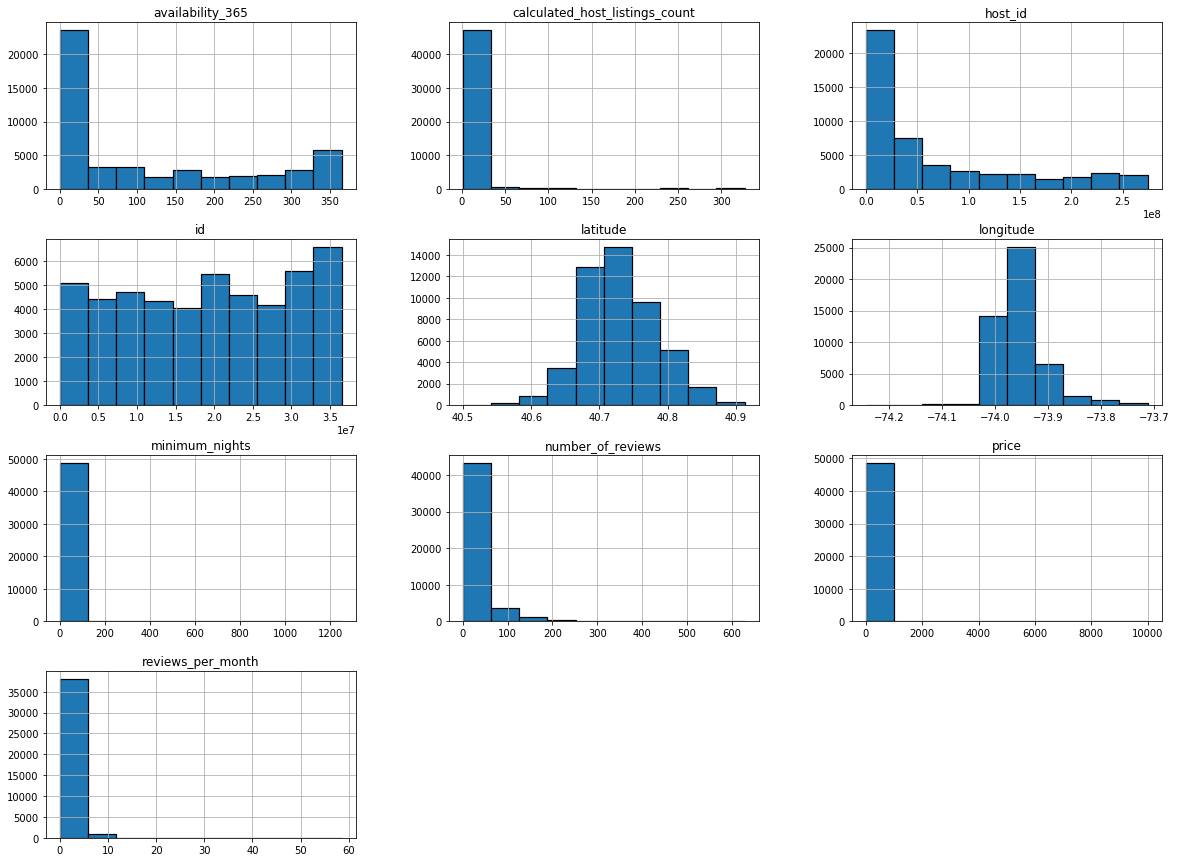

In [27]:
df.hist(edgecolor="black", linewidth=1.2, figsize=(20,15))

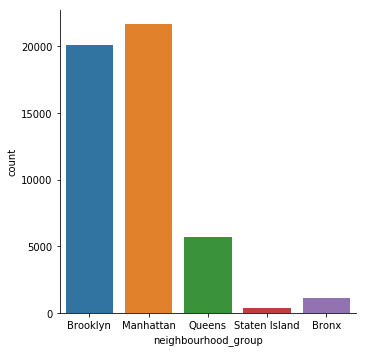

In [29]:
sns.catplot("neighbourhood_group", data=df, kind="count", height=5)


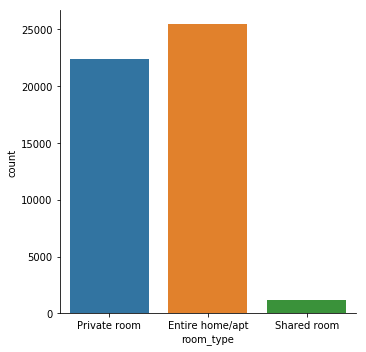

In [30]:
sns.catplot("room_type", data=df, kind="count", height=5)


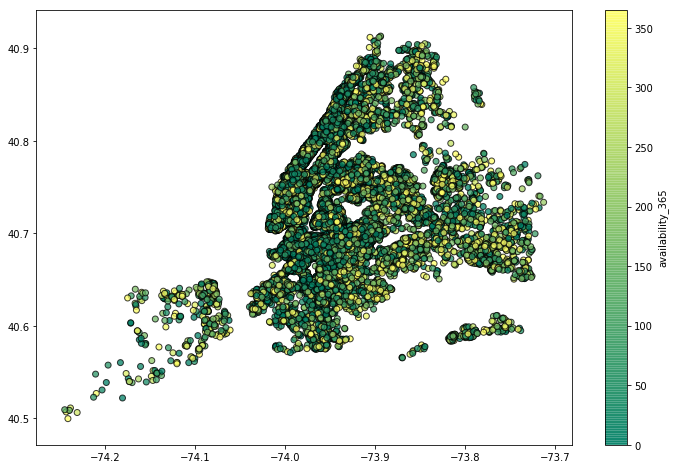

In [31]:
plt.figure(figsize=(12, 8))
plt.scatter(df.longitude, df.latitude, c=df.availability_365, cmap='summer', edgecolor='black', linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('availability_365')

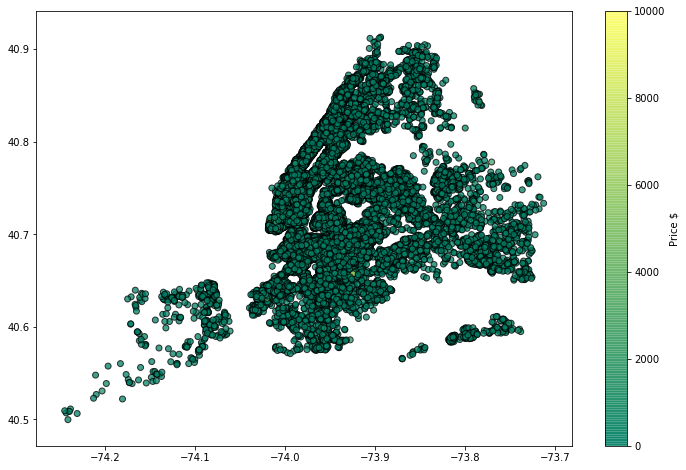

In [32]:
plt.figure(figsize=(12, 8))
plt.scatter(df.longitude, df.latitude, c=df.price, cmap='summer', edgecolor='black', linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('Price $')

In [33]:
df[df.price == 0]


id  ... availability_365
23161  18750597  ...               28
25433  20333471  ...              127
25634  20523843  ...                0
25753  20608117  ...                0
25778  20624541  ...               73
25794  20639628  ...              176
25795  20639792  ...              232
25796  20639914  ...              222
26259  20933849  ...                0
26841  21291569  ...              333
26866  21304320  ...              139

[11 rows x 16 columns]

# **Preprocessing Data**

In [35]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

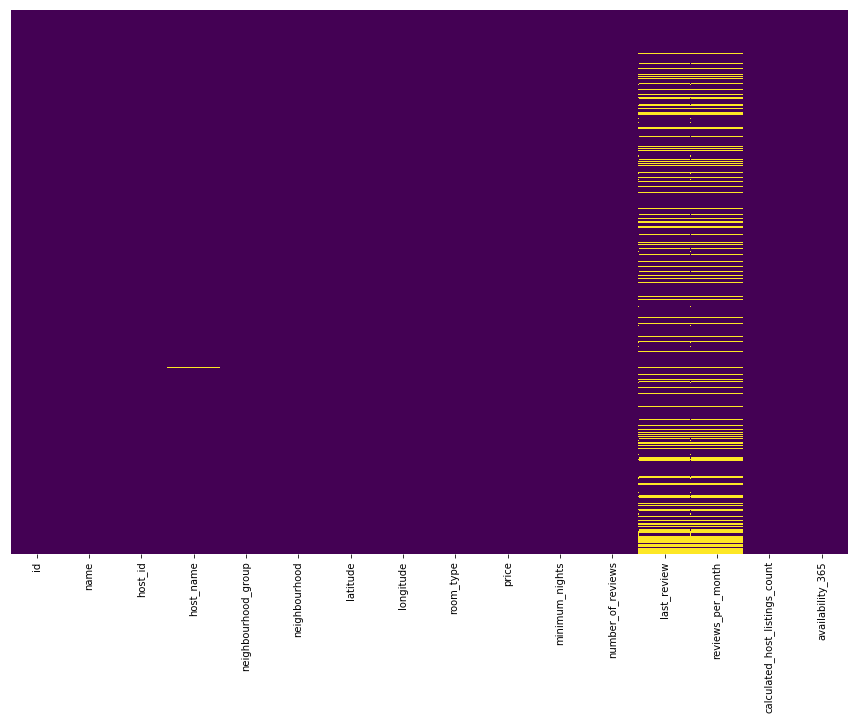

In [36]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [0]:
d1 = pd.DataFrame(df.groupby(['room_type'])['reviews_per_month'].mean())

In [38]:
d1

reviews_per_month
room_type                         
Entire home/apt           1.306578
Private room              1.445209
Shared room               1.471726

In [0]:
test_data = df

In [0]:
def update_reviews_per_month(cols):
    reviews_per_month = cols[0]
    room_type = cols[1]
    
    if pd.isnull(reviews_per_month):

        if room_type == 'Entire home/apt':
            return 1.306578

        elif room_type == 'Private room':
            return 1.445209

        else:
            return 1.471726

    else:
        return reviews_per_month 

In [0]:
test_data['reviews_per_month'] = test_data[['reviews_per_month','room_type']].apply(update_reviews_per_month,axis=1)

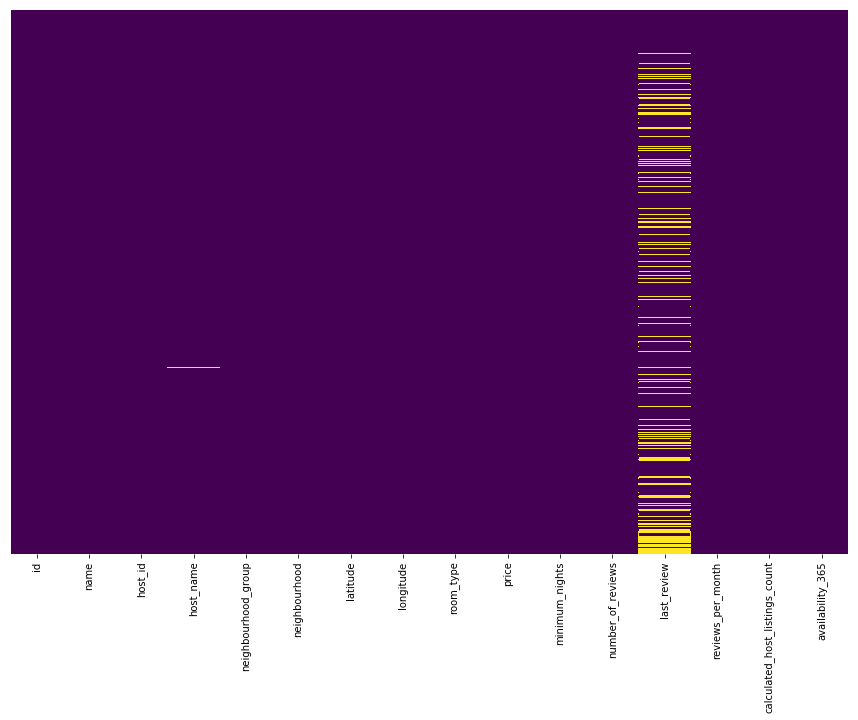

In [96]:
plt.figure(figsize=(15,10))
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [97]:
test_data = pd.get_dummies(test_data, columns=['room_type', 'neighbourhood_group'])
test_data.head()


id  ... neighbourhood_group_Staten Island
0  2539  ...                                 0
1  2595  ...                                 0
2  3647  ...                                 0
3  3831  ...                                 0
4  5022  ...                                 0

[5 rows x 22 columns]

In [0]:
from sklearn import preprocessing

"""le = preprocessing.LabelEncoder()
le.fit(test_data['room_type'])
le.transform(test_data['room_type'])
test_data['room_type']=le.transform(test_data['room_type'])

le = preprocessing.LabelEncoder()
le.fit(test_data['neighbourhood_group'])
le.transform(test_data['neighbourhood_group'])
test_data['neighbourhood_group']=le.transform(test_data['neighbourhood_group'])"""

le = preprocessing.LabelEncoder()
le.fit(test_data['neighbourhood'])
le.transform(test_data['neighbourhood'])
test_data['neighbourhood']=le.transform(test_data['neighbourhood'])


In [99]:
test_data.head()

id  ... neighbourhood_group_Staten Island
0  2539  ...                                 0
1  2595  ...                                 0
2  3647  ...                                 0
3  3831  ...                                 0
4  5022  ...                                 0

[5 rows x 22 columns]

In [100]:
test_data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room',
       'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island'],
      dtype='object')

In [101]:
print(test_data.describe().loc["mean", :])
print("====================================")
print(test_data.describe().loc["std", :])

id                                   1.901714e+07
host_id                              6.762001e+07
neighbourhood                        1.071227e+02
latitude                             4.072895e+01
longitude                           -7.395217e+01
price                                1.527207e+02
minimum_nights                       7.029962e+00
number_of_reviews                    2.327447e+01
reviews_per_month                    1.373796e+00
calculated_host_listings_count       7.143982e+00
availability_365                     1.127813e+02
room_type_Entire home/apt            5.196646e-01
room_type_Private room               4.566111e-01
room_type_Shared room                2.372431e-02
neighbourhood_group_Bronx            2.231312e-02
neighbourhood_group_Brooklyn         4.111668e-01
neighbourhood_group_Manhattan        4.430105e-01
neighbourhood_group_Queens           1.158810e-01
neighbourhood_group_Staten Island    7.628592e-03
Name: mean, dtype: float64
id                     

# Features Selection

In [0]:
X = test_data.drop(columns = ['price', 'id', 'name', 'host_name', 'last_review', 'latitude', 'longitude'])
y = test_data['price']

**Splitting Data in Train Test**

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Methodology and Evaluation

**Linear Regression Methodology**

In [74]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
print(lm.intercept_)

67.62860929592291


In [52]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
host_id                            4.427292e-08
neighbourhood                      8.058876e-02
minimum_nights                    -2.408354e-02
number_of_reviews                 -3.191862e-01
reviews_per_month                  1.160562e+00
calculated_host_listings_count    -1.201513e-01
availability_365                   1.804834e-01
room_type_Entire home/apt          8.490431e+01
room_type_Private room            -2.556332e+01
room_type_Shared room             -5.934099e+01
neighbourhood_group_Bronx         -3.057935e+01
neighbourhood_group_Brooklyn       9.843123e+00
neighbourhood_group_Manhattan      6.088719e+01
neighbourhood_group_Queens        -1.197694e+01
neighbourhood_group_Staten Island -2.817402e+01

In [0]:
predictions = lm.predict(X_test)

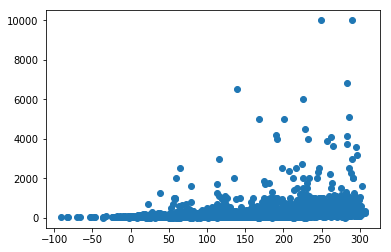

In [54]:
plt.scatter(predictions,y_test)

**Linear Regression Evaluation**

In [0]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': predictions.flatten()})
error_diff1 = error_diff.head(20)

In [56]:
error_diff1.head()

Actual Values  Predicted Values
0             99        111.511742
1             40         56.132684
2            149        171.090825
3             80        114.967588
4             95        176.785656

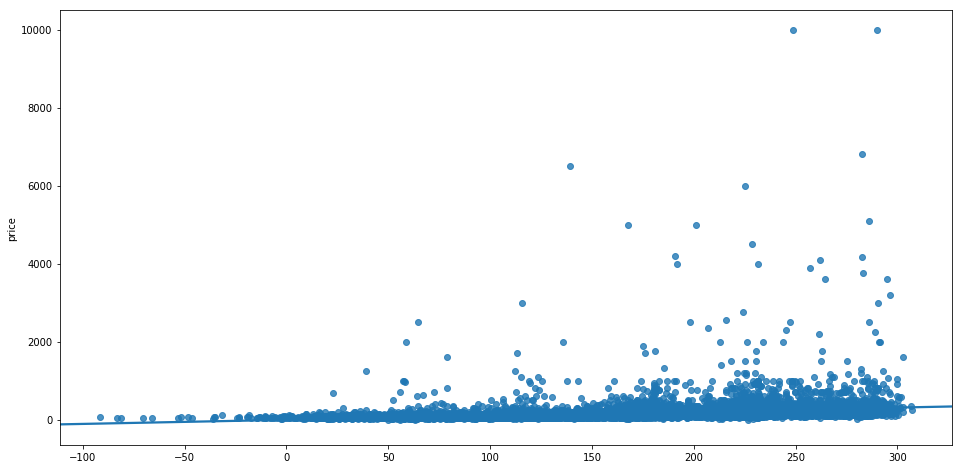

In [84]:
plt.figure(figsize=(16,8))
sns.regplot(predictions,y_test)

In [58]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 75.32038941036086
RMSE: 235.36890160056066


In [92]:
lm.score(X_test, predictions)


1.0

**Gradient Boosted Regressor model**

In [0]:
from sklearn.ensemble import GradientBoostingRegressor

GBoost = GradientBoostingRegressor(n_estimators=4000, learning_rate=0.01)

In [77]:
GBoost.fit(X_train,y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=4000,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
gboost_predict = GBoost.predict(X_test)


**GBoost Evaluation**

In [79]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, gboost_predict))
print('RMS:' ,np.sqrt(metrics.mean_squared_error(y_test,gboost_predict)))


MAE: 68.971765052879
RMS: 233.07393023534036


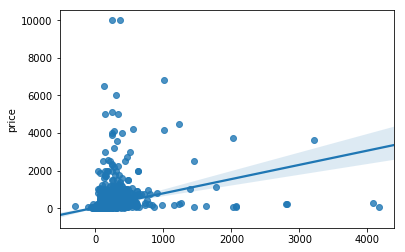

In [80]:
sns.regplot(gboost_predict,y_test)